## __EN2550 - Assignment 02__

##### Name : Kumara B.W.J.C.



##### Index Number : 190328V

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import math
import cv2 as cv
import  circle_fit as cf 

In [2]:
def CircleCenter(c1,c2,c3):
    c = (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2
    a = (c2[0]-c3[0])**2 + (c2[1]-c3[1])**2
    b = (c3[0]-c1[0])**2 + (c3[1]-c1[1])**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*c1[0] + b*(c+a-b)*c2[0] + c*(a+b-c)*c3[0]) / s
    py = (a*(b+c-a)*c1[1] + b*(c+a-b)*c2[1] + c*(a+b-c)*c3[1]) / s

    ar = np.sqrt(a)
    br = np.sqrt(b)
    cr = np.sqrt(c)
    r = ar*br*cr / np.sqrt((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))

    return r, [px,py]

def CheckPoints(X,radius,center,t):
    inlier_count = 0;
    inliers = []
    outliers = []
    upper_thresh = radius+t
    lower_thresh = radius-t
    for p in X:
        dis = np.abs(np.sqrt((p[0]-center[0])**2+(p[1]-center[1])**2))
        if lower_thresh<=dis<=upper_thresh:
            inliers.append(p)
            inlier_count+=1
        else:
            outliers.append(p)
    return inliers,outliers,inlier_count
            




In [3]:
#RANSAC Algorithm
def RANSAC(X):
    s = 3  # Minimum number of points needed to fit to a circle is 3
    t = 1.96 # to capture 95% of all inliers
    d = 50 
    p = 0.99
    N = int(np.ceil(np.log(1-p)/np.log(1-(1-0.5)**s)))

    max_inliers = 0;

    for i in range(N):
        c1,c2,c3 = X[np.random.randint(0,100)],X[np.random.randint(0,100)],X[np.random.randint(0,100)]
        radius, center = CircleCenter(c1,c2,c3)
        inliers, outliers, inlier_count = CheckPoints(X,radius,center,t)
        if max_inliers<inlier_count:
            max_inliers = inlier_count
            best_sample = np.array([list(c1),list(c2),list(c3)])
            best_inliers = np.array(inliers)
            best_outliers = np.array(outliers)
            best_radius = radius
            best_center = center
    
    # Calculate the best circle to fit all the inliers
    xr,yr ,R_Radius,k = cf.least_squares_circle(best_inliers)
    R_Center = (xr,yr)

    return best_inliers ,best_outliers, best_sample,best_center, best_radius, R_Center,R_Radius

    


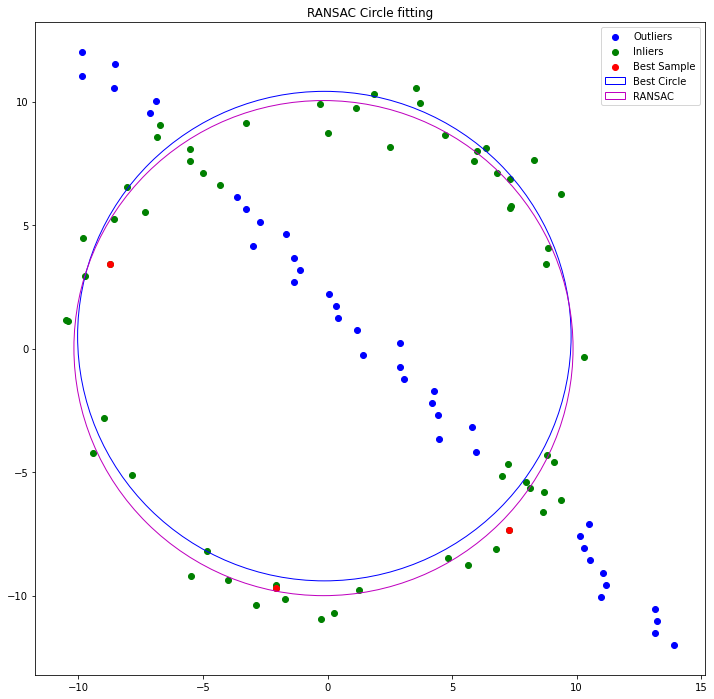

In [4]:
N=100
half_n = N//2
r =10
s =r/16
t =np.random.uniform(0,2*np.pi,half_n)

n = s*np.random.randn(half_n)
x,y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b = -1,2
x = np.linspace(-12,12,half_n)
y =m*x + b +s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

best_inliers ,best_outliers, best_sample,best_center, best_radius, R_Center,R_Radius = RANSAC(X)

RANSAC_circle = plt.Circle(R_Center,R_Radius,color = 'm',fill = False,label = "RANSAC")

fig, ax = plt.subplots(figsize = (12,12),facecolor = "white")

# Circle to fit the best 3 samples
best_circle = plt.Circle((best_center[0],best_center[1]),best_radius,color = 'blue',fill = False,label = "Best Circle")

# Plotting inliers, Outliers and the Best 3 samples
ax.scatter(best_outliers[:,1],best_outliers[:,0], c= 'blue',label = "Outliers")
ax.scatter(best_inliers[:,1],best_inliers[:,0],c = 'green',label = "Inliers")
ax.scatter(best_sample[:,1],best_sample[:,0],c = 'red',label = "Best Sample")

#Plotting two circles
ax.add_patch(best_circle)
ax.add_patch(RANSAC_circle)
ax.legend(loc = "upper right")

ax.set_title("RANSAC Circle fitting")
plt.show()


### __Question 02__

In [5]:
def click_event(event, x, y, flags, params):
    global locs
    global points
    global image_copy

    if event == cv.EVENT_LBUTTONDOWN:
        locs.append([x, y])
        points += 1
        image_copy = cv.circle(image_copy, (x,y), 3, (0, 0, 255), -1)
        cv.imshow("Image", image_copy)        
    
    if points == 4:
        cv.destroyAllWindows()
        cv.waitKey(1)
        

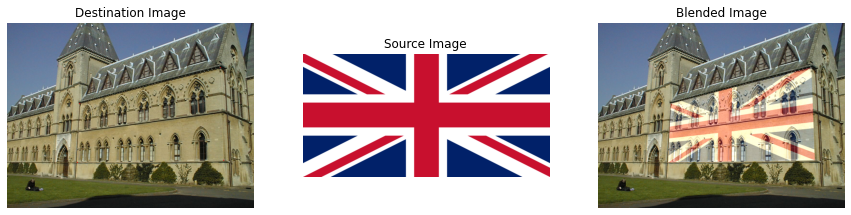

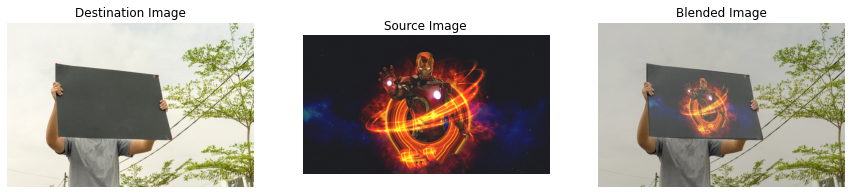

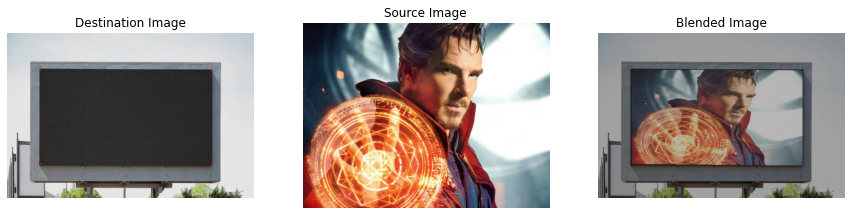

In [6]:
points = []
clicks=0  

# Function to select four points from the destination image
def click_event(event, x, y, flags, params):
    global points
    global clicks
    if clicks == 4:
        return  
    if event == cv.EVENT_LBUTTONDOWN:
        points.append([x,y])
        clicks+=1

        font = cv.FONT_HERSHEY_SIMPLEX
        cv.circle(img,(x,y),2, (0, 0, 255), -1)
        cv.imshow('image', img)
    
#List of source and destination images
source_images = ["Images/uk.png","Images/ironman.jpg","Images/strange.jpg"]
background_images = ['Images/002.jpg',"Images/poster.jpg","Images/bill.jpg"]
coffs = [(1,0.4,0.2),(0.8,0.7,0),(0.7,0.6,0)]

images = []

for i in range(len(source_images)): # Loop for all the images
    if len(images)==i+1:pass
    points = []
    clicks = 0
    # Reading bckground image
    img = cv.imread(background_images[i], 1)

    # displaying the image
    cv.imshow('image', img)

    #getting 
    cv.setMouseCallback('image', click_event)
   
    # wait for a key to be pressed to exit
    cv.waitKey(0)

    # close the window
    cv.destroyAllWindows()

    # Read source image.
    im_src = cv.imread(source_images[i])
    w,h = im_src.shape[1],im_src.shape[0]

    # Four corners of the book in source image
    pts_src = np.array([[0, 0], [w-1, 0], [w-1, h-1],[0, h-1]])

    # Read destination image.
    im_dst = cv.imread(background_images[i])

    # Four corners of the book in destination image.
    pts_dst = np.array(points)

    # Calculate Homography
    h, status = cv.findHomography(pts_src, pts_dst)

    # Warp source image to destination based on homography
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
   
    blended_img = cv.addWeighted(im_dst, coffs[i][0], im_out, coffs[i][1], coffs[i][2])
    images.append([img,im_src,blended_img]) #background,source,blend
    cv.imshow("Blended Image", blended_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

for im in images:
    fig,ax = plt.subplots(1,3,figsize=(15,10),facecolor = "white")
    titles=['Destination Image','Source Image','Blended Image']
    for j in range(3):
        transformed_img_ = cv.cvtColor(im[j],cv.COLOR_BGR2RGB)
        ax[j].axis('off')
        ax[j].imshow(transformed_img_)
        ax[j].set_title(titles[j])

### __Question 03__

### __a)__

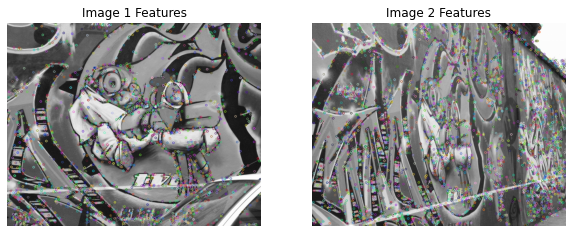

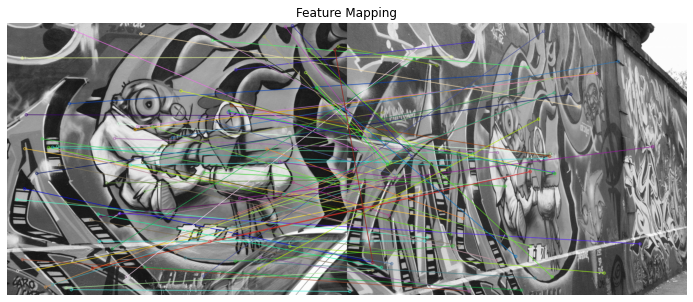

In [7]:

img1 = cv.imread('Images/img1.ppm',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('Images/img5.ppm',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

kp_img1 = cv.drawKeypoints(img1,kp1,np.zeros(img1.shape))
kp_img2 = cv.drawKeypoints(img2,kp2,np.zeros(img2.shape))
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig, ax = plt.subplots(1,2,figsize = (10,5),facecolor = "white")
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 5),facecolor = "white")

ax[0].imshow(kp_img1)
ax[1].imshow(kp_img2)
ax2.imshow(img3)

ax[0].set_title("Image 1 Features")
ax[1].set_title("Image 2 Features")
ax2.set_title("Feature Mapping")

ax[0].axis("off")
ax[1].axis("off")
ax2.axis("off")

plt.show()


### __b)__

In [46]:
# Calculating Homography
def CalcHomography(points,dst_points):
    A=[]

    for i in range(len(points)):
        A1 = np.concatenate((np.zeros(3),-points[i],dst_points[i][1]*points[i]),axis=None)
        A2 = np.concatenate((-points[i],np.zeros(3),dst_points[i][0]*points[i]),axis=None)
        A.append(A2)
        A.append(A1)

    A = np.array(A)    
    W,V = np.linalg.eig(A.T @ A)
    H = np.reshape(np.array(V[:,np.argmin(W)]),(3,3)) 

    return H/H[2][2]

def CalcMatches(a,b):
    # read images
    img1 = cv.imread('Images/img%d.ppm'%a)  
    img2 = cv.imread('Images/img%d.ppm'%b) 
    
    #sift features
    sift = cv.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    #feature matching
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    fig,ax=plt.subplots(figsize=(6,6),facecolor = "white")
    ax.axis('off')
    ax.set_title("SIFT Matches")

    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
    plt.imshow(img3),plt.show()
    

    FLANN_INDEX_KDTREE = 0
    indexParams = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
    searchParams = dict(checks=50)
    flann = cv.FlannBasedMatcher(indexParams,searchParams)
    matches = flann.knnMatch(descriptors_1,descriptors_2,k=2)


    ptsLeft = []
    ptsRight = []
    
    for m,n in matches:
        if m.distance < 0.7 * n.distance:
            ptsLeft.append(keypoints_1[m.queryIdx].pt)
            ptsRight.append(keypoints_2[m.trainIdx].pt)

    for i in range(len(ptsLeft)):
        ptsLeft[i]=list(ptsLeft[i])
        ptsLeft[i].append(1)
        ptsRight[i]=list(ptsRight[i])
        ptsRight[i].append(1)
    
    return (np.array(ptsLeft),np.array(ptsRight))

def CalcRANSAC(points):   
    (ptsLeft,ptsRight) = points
    N = 200
    inlier_counts=[]
    H_set=[]    
    for _ in range(N):
        left = []
        right = []
        inliers=[]

        for i in range(4):
            j = np.random.randint(0,len(ptsLeft))
            left.append(ptsLeft[j])
            right.append(ptsRight[j])

        H = CalcHomography(left,right) 
        ssd_sum = 0
     
        for j in range(len(ptsLeft)):
            p = ptsLeft[j]
            p_new = (H @ np.reshape(p,(3,1)))
            p_new = p_new/p_new[2:]
            ssd= np.sqrt(np.sum(np.square(np.reshape(p_new,(1,3))-ptsRight[j])))
            if ssd<1:
                inliers.append(p)
        inlier_counts.append(len(inliers))
        H_set.append(H)

    s = H_set[inlier_counts.index(max(inlier_counts))]
    return s/s[2][2]

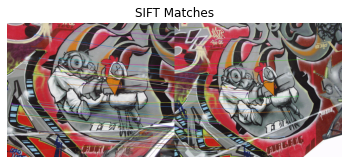

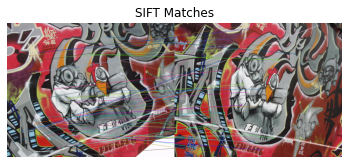

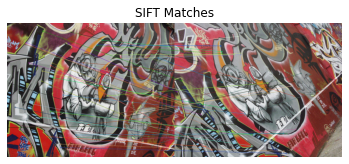

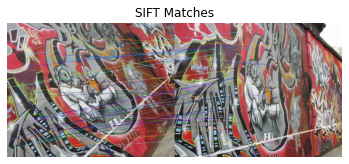

In [47]:
H1 = CalcRANSAC(CalcMatches(1,2))
H2 = CalcRANSAC(CalcMatches(2,3))
H3 = CalcRANSAC(CalcMatches(3,4))
H4 = CalcRANSAC(CalcMatches(4,5))    
H = H4@H3@H2@H1



In [48]:
print(H/H[2][2])

[[ 6.18584754e-01  4.80652528e-02  2.23143635e+02]
 [ 2.17894694e-01  1.14744748e+00 -2.25768285e+01]
 [ 4.80330509e-04 -5.96571938e-05  1.00000000e+00]]


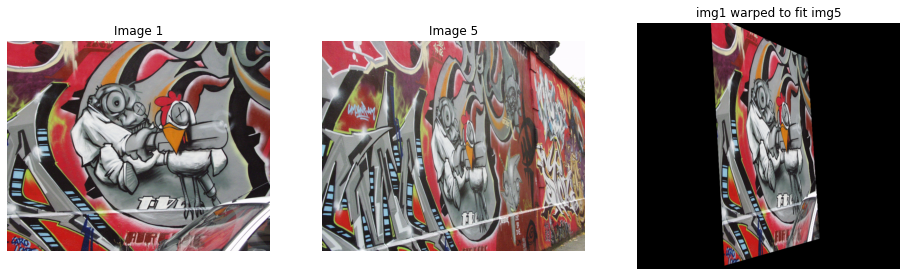

In [42]:
im1 = cv.imread('Images/img1.ppm') 
im5 =  cv.imread('Images/img5.ppm') 

im_warped = cv.warpPerspective(im1,H/H[2][2],(im5.shape[1],750))

fig1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
fig2 = cv.cvtColor(im5,cv.COLOR_BGR2RGB)
fig3 = cv.cvtColor(im_warped,cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize=(16,24),facecolor ="white")
ax[0].imshow(fig1)
ax[1].imshow(fig2)
ax[2].imshow(fig3)

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

ax[0].set_title("Image 1")
ax[1].set_title("Image 5")
ax[2].set_title("img1 warped to fit img5")

plt.show()




### __c)__

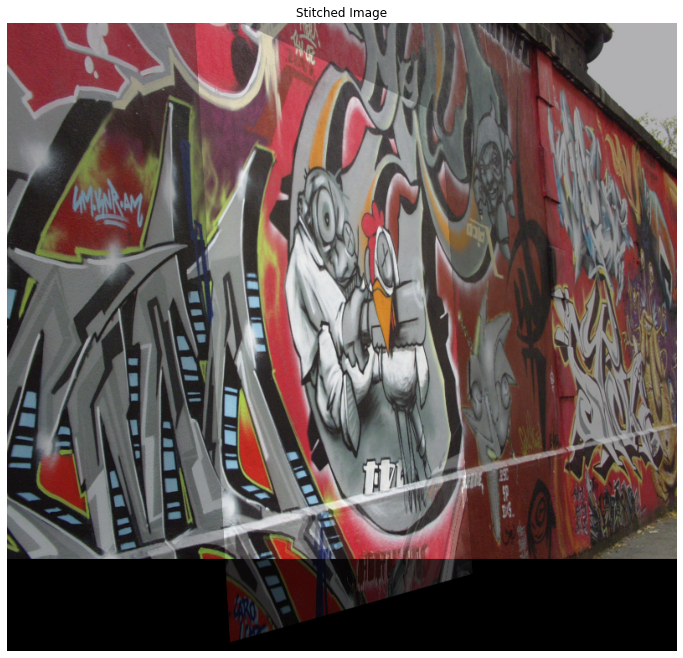

In [43]:
# Stiching the images

im5_diff = cv.warpPerspective(im5,np.identity(3),(im5.shape[1],750))

blended_img = cv.addWeighted(im5_diff,0.7,im_warped,0.3,0)

blended_img = cv.cvtColor(blended_img,cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(figsize = (12,12), facecolor ="white")

ax.imshow(blended_img)

ax.axis('off')

ax.set_title("Stitched Image")

plt.show()